<a href="https://colab.research.google.com/github/luqyz/Linear-Regression/blob/main/Linear_Regression_(day_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [ ]:
import io
dataDay = pd.read_csv(io.BytesIO(uploaded['day.csv']))

In [ ]:
# To identify and handle missing values
dataDay.isnull().sum()
dataDay.dropna(inplace=True)

# To check duplicate value
dataDay.duplicated().sum()
dataDay.drop_duplicates(inplace=True)

# Removing unwanted columns
dataDay = dataDay.drop(['casual', 'registered'], axis=1)

#save the clean dataset
dataDay.to_csv('cleanDay_data.csv', index=False)

In [ ]:
dataDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


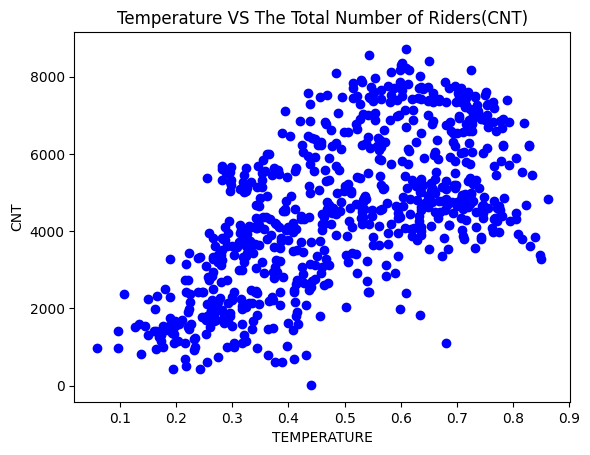

In [ ]:
dataDay = dataDay[["weekday", "weathersit", "temp", "atemp","hum","windspeed","cnt"]]

plt.scatter(dataDay["temp"], dataDay["cnt"], color="blue")
plt.xlabel("TEMPERATURE")
plt.ylabel("CNT")
plt.title("Temperature VS The Total Number of Riders(CNT)")
plt.show()

train = dataDay[:(int((len(dataDay)*0.8)))]
test = dataDay[(int((len(dataDay)*0.8))):]

In [ ]:
print(train)

     weekday  weathersit      temp     atemp       hum  windspeed   cnt
0          6           2  0.344167  0.363625  0.805833   0.160446   985
1          0           2  0.363478  0.353739  0.696087   0.248539   801
2          1           1  0.196364  0.189405  0.437273   0.248309  1349
3          2           1  0.200000  0.212122  0.590435   0.160296  1562
4          3           1  0.226957  0.229270  0.436957   0.186900  1600
..       ...         ...       ...       ...       ...        ...   ...
579        4           1  0.752500  0.707088  0.659583   0.129354  7261
580        5           2  0.765833  0.722867  0.642500   0.215792  7175
581        6           1  0.793333  0.751267  0.613333   0.257458  6824
582        0           1  0.769167  0.731079  0.652500   0.290421  5464
583        1           2  0.752500  0.710246  0.654167   0.129354  7013

[584 rows x 7 columns]


In [ ]:
print(test)

     weekday  weathersit      temp     atemp       hum  windspeed   cnt
584        2           2  0.735833  0.697621  0.703750   0.116908  7273
585        3           2  0.750000  0.707717  0.672917   0.110700  7534
586        4           1  0.755833  0.699508  0.620417   0.156100  7286
587        5           2  0.715833  0.667942  0.715833   0.238813  5786
588        6           2  0.692500  0.638267  0.732917   0.206479  6299
..       ...         ...       ...       ...       ...        ...   ...
726        4           2  0.254167  0.226642  0.652917   0.350133  2114
727        5           2  0.253333  0.255046  0.590000   0.155471  3095
728        6           2  0.253333  0.242400  0.752917   0.124383  1341
729        0           1  0.255833  0.231700  0.483333   0.350754  1796
730        1           2  0.215833  0.223487  0.577500   0.154846  2729

[147 rows x 7 columns]


In [ ]:
X = dataDay[['temp', 'atemp', 'windspeed']]
y = dataDay['cnt']

x1_train, x1_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", x1_train.shape)
print("Shape of X_test:", x1_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (584, 3)
Shape of X_test: (147, 3)
Shape of y_train: (584,)
Shape of y_test: (147,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(X_normalized)

[[0.3551696  0.37351738 0.2846062 ]
 [0.37923205 0.36054067 0.46621455]
 [0.1709998  0.14483011 0.4657404 ]
 ...
 [0.24198597 0.2143932  0.21026043]
 [0.2451011  0.20034801 0.67693615]
 [0.19525913 0.18956733 0.27306151]]


In [ ]:
print (int((len(dataDay)*0.8)))


from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["temp"]])
train_y = np.array(train[["cnt"]])

regr.fit(train_x,train_y)

print ("coefficients : ",regr.coef_[0][0])
print ("Intercepts : ",regr.intercept_[0])

584
coefficients :  6506.6968860047655
Intercepts :  917.9108340119883


Text(0.5, 1.0, 'Temperature VS The Total Number of Riders (CNT)')

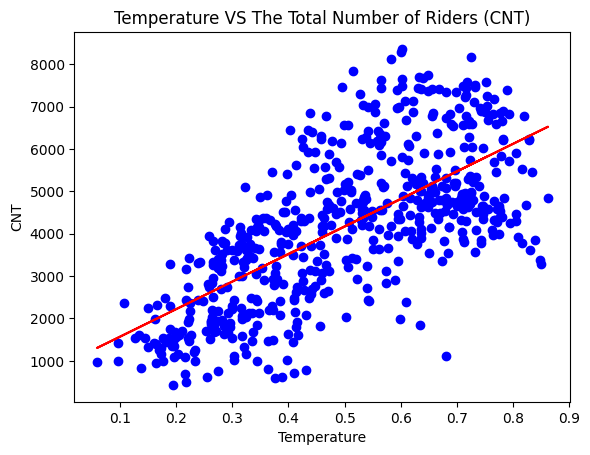

In [ ]:
plt.scatter(train["temp"], train["cnt"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r')
plt.xlabel("Temperature")
plt.ylabel("CNT")
plt.title("Temperature VS The Total Number of Riders (CNT)")

In [ ]:
def get_regression_predictions(input_features,intercept,slope):
  predicted_values = input_features*slope + intercept

  return predicted_values

In [ ]:
#Predicting future usage of bike
value_temp = 0.26

estimated_bike = get_regression_predictions(value_temp,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated bike :", estimated_bike)

Estimated bike : 2609.6520243732275


In [ ]:
#Checking accuracy

from sklearn.metrics import r2_score

test_x = np.array(test[['temp']])
test_y = np.array(test[['cnt']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 2053.29
Mean sum of squares (MSE): 5218915.11
R2-score: -3.80


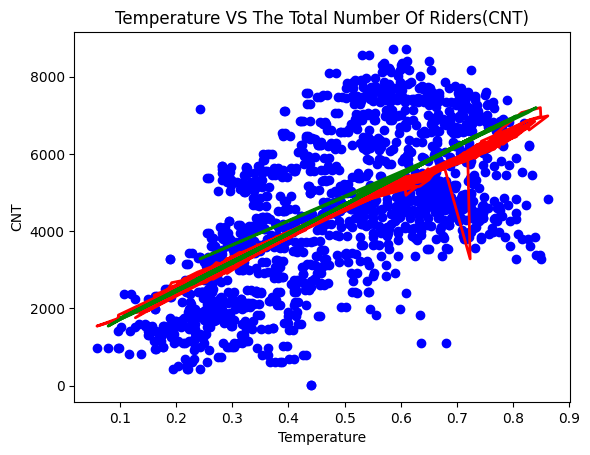

In [ ]:

# Extract independent and dependent variables from the data
X = dataDay[['temp', 'atemp']]
y = dataDay['cnt']

# Create linear regression object
regressor = LinearRegression()

# Fit the regression model
regressor.fit(X, y)

# Predict the dependent variable(cnt)
y_pred = regressor.predict(X)

# Plot the multiple linear regression graph
plt.scatter(X['temp'], y, color='blue') # plot temperature against cnt
plt.scatter(X['atemp'], y, color='blue') # plot atemp  against cnt

plt.plot(X['temp'], y_pred, color='red', linewidth=2) # plotting temperature regression line
plt.plot(X['atemp'], y_pred, color='green', linewidth=2) # plotting atemp regression line

plt.xlabel('Temperature')
plt.ylabel('CNT')
plt.title('Temperature VS The Total Number Of Riders(CNT)')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
#Normalizing variable
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_normalized, y)

y_pred = model.predict(X_normalized)

r2 = r2_score(y, y_pred)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2 score:", r2)

Mean absolute error: 2049.17
Mean sum of squares (MSE): 5293996.48
R2 score: 0.4141625623579892
